# Khai báo thư viện

In [212]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [52]:
from collections import defaultdict

from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import GlobalMaxPooling1D, Embedding, Conv1D, Activation, Dense, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Đưa tập dữ liệu vào chương trình

In [222]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,label-coarse,label-fine,text
0,0,0,How did serfdom develop in and then leave Russ...
1,1,1,What films featured the character Popeye Doyle ?
2,0,0,How can I find a list of celebrities ' real na...
3,1,2,What fowl grabs the spotlight after the Chines...
4,2,3,What is the full form of .com ?


In [6]:
df_test.head()

,label-coarse,label-fine,text
0,4,40,How far is it from Denver to Aspen ?
1,5,21,"What county is Modesto , California in ?"
2,3,12,Who was Galileo ?
3,0,7,What is an atom ?
4,4,8,When did Hawaii become a state ?


In [7]:
df_train.isnull().sum()

label-coarse    0
label-fine      0
text            0
dtype: int64

In [8]:
df_test.isnull().sum()

label-coarse    0
label-fine      0
text            0
dtype: int64

# Khai phá dữ liệu văn bản

### Số lượng phản hồi dựa trên 2 nhãn

Text(0, 0.5, 'Số lượng')

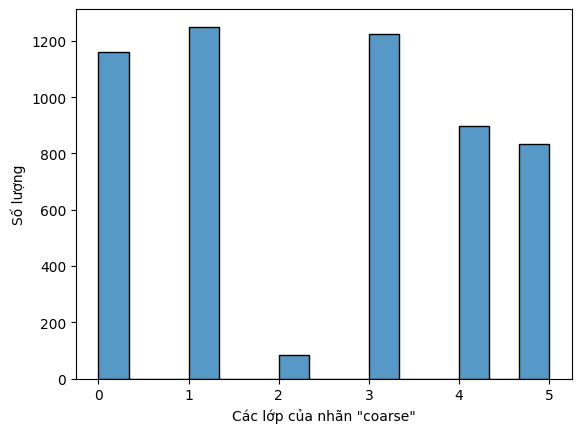

In [127]:
sns.histplot(data=df_train, x=df_train['label-coarse'])
plt.xlabel('Các lớp của nhãn "coarse"')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

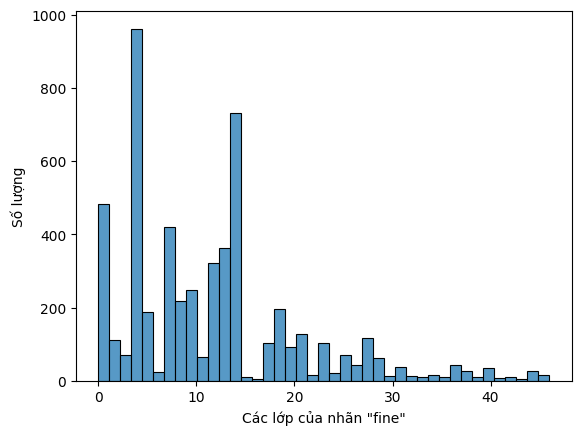

In [126]:
sns.histplot(data=df_train, x=df_train['label-fine'])
plt.xlabel('Các lớp của nhãn "fine"')
plt.ylabel('Số lượng')

# Tiền xử lý dữ liệu

### In thường các văn bản (các hỏi)

In [223]:
def convert_lowercase(text):
    text = text.lower()
    return text

df_train['text'] = df_train['text'].apply(convert_lowercase)
df_test['text'] = df_test['text'].apply(convert_lowercase)
df_train

,label-coarse,label-fine,text
0,0,0,how did serfdom develop in and then leave russ...
1,1,1,what films featured the character popeye doyle ?
2,0,0,how can i find a list of celebrities ' real na...
3,1,2,what fowl grabs the spotlight after the chines...
4,2,3,what is the full form of .com ?
...,...,...,...
5447,1,14,what 's the shape of a camel 's spine ?
5448,1,46,what type of currency is used in china ?
5449,4,41,what is the temperature today ?
5450,4,41,what is the temperature for cooking ?


### Loại bỏ dấu câu

In [224]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df_train['text'] = df_train['text'].apply(remove_punc)
df_test['text'] = df_test['text'].apply(remove_punc)
df_train

,label-coarse,label-fine,text
0,0,0,how did serfdom develop in and then leave russia
1,1,1,what films featured the character popeye doyle
2,0,0,how can i find a list of celebrities real names
3,1,2,what fowl grabs the spotlight after the chines...
4,2,3,what is the full form of com
...,...,...,...
5447,1,14,what s the shape of a camel s spine
5448,1,46,what type of currency is used in china
5449,4,41,what is the temperature today
5450,4,41,what is the temperature for cooking


### Loại bỏ từ dừng

In [225]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    for word in words:
        if word not in stop:
            new_list.append(word)
    return ' '.join(new_list)

df_train['text'] = df_train['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)
df_train

,label-coarse,label-fine,text
0,0,0,serfdom develop leave russia
1,1,1,films featured character popeye doyle
2,0,0,find list celebrities real names
3,1,2,fowl grabs spotlight chinese year monkey
4,2,3,full form com
...,...,...,...
5447,1,14,shape camel spine
5448,1,46,type currency used china
5449,4,41,temperature today
5450,4,41,temperature cooking


### Rút gọn gốc của các từ vựng

In [226]:
from nltk.stem.wordnet import WordNetLemmatizer

def perform_lemmatization(text):
    lem = WordNetLemmatizer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(lem.lemmatize(word, 'v'))

    return " ".join(new_list)

df_train['text'] = df_train['text'].apply(perform_lemmatization)
df_test['text'] = df_test['text'].apply(perform_lemmatization)
df_train

,label-coarse,label-fine,text
0,0,0,serfdom develop leave russia
1,1,1,film feature character popeye doyle
2,0,0,find list celebrities real name
3,1,2,fowl grab spotlight chinese year monkey
4,2,3,full form com
...,...,...,...
5447,1,14,shape camel spine
5448,1,46,type currency use china
5449,4,41,temperature today
5450,4,41,temperature cook


# Khai phá dữ liệu văn bản (tiếp theo)

### Xác định các lớp của 2 nhãn

In [193]:
coarse = np.array(["Abbreviation", "Entity", "Description and abstract concept",
                     "Human being", "Location", "Numeric value"]).astype('object')

fine = np.array(["Abbreviation", "Expression abbreviated",
                  
                  "Animal", "Organ of body", "Color", "Invention, book and other creative piece",
                  "Currency name", "Disease and medicine", "Event", "Food", "Musical instrument",
                  "Language", "Letter like a-z", "Other entity", "Plant", "Product", "Religion",
                  "Sport", "Element and substance", "Symbols and sign", "Techniques and method",
                  "Equivalent term", "Vehicle", "Word with a special property",
                  
                  "Definition of something", "Description of something", "Manner of an action",
                  "Reason",
                  
                  "Group or organization of perple", "Individual", "Title of a person", 
                  "Description of a person", 
                  
                  "City", "Country", "Mountain", "Other location", "State",
                  
                  "Postcode or other code", "Number of something", "Date", "Distance, linear measure",
                  "Price", "Order, rank", "Other number", "Lasting time of something", "Percent, fraction",
                  "Speed"]).astype('object')


In [257]:
print("Số lớp của nhãn \"coarse\":", len(coarse))
print("Số lớp của nhãn \"fine\":", len(fine))

Số lớp của nhãn "coarse": 6
Số lớp của nhãn "fine": 47


### Tìm các tự vựng được sử dụng nhiều nhất tại các lớp của nhãn "coarse"

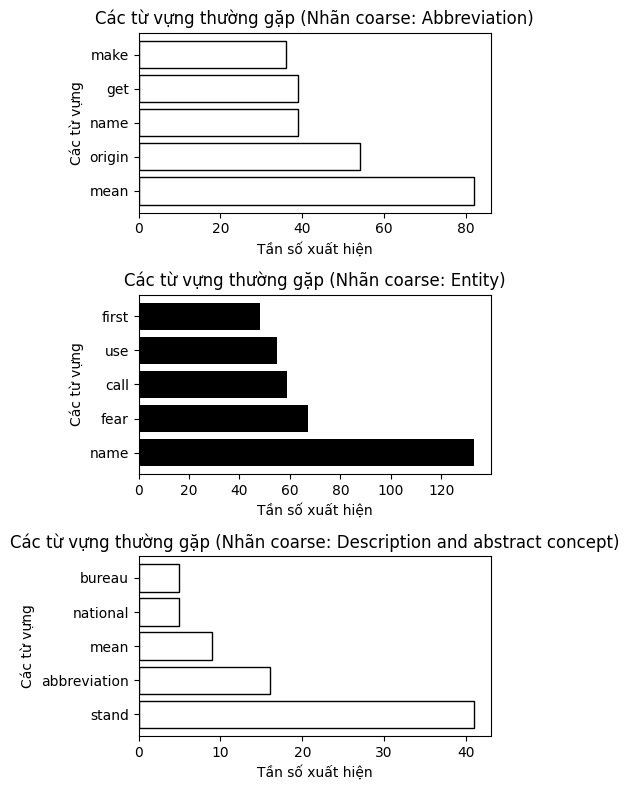

In [131]:
def create_corpus(coarse):
    corpus=[]
    for x in df_train[df_train['label-coarse']==coarse]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


plt.figure(figsize = (5, 8))
def plot_most_common_words(corpus, coarse, color):
    word_freq = defaultdict(int)
    for word in corpus: 
        word_freq[word] += 1

    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    x, y = zip(*top_words)

    plt.barh(x, y, color=color, ec='k' if color == 'white' else None, linewidth = 1)  
    plt.ylabel('Các từ vựng')          
    plt.xlabel('Tần số xuất hiện')      
    plt.title(f'Các từ vựng thường gặp (Nhãn coarse: {coarse[coarse]})')


corpus_positive = create_corpus(0)
plt.subplot(3, 1, 1)
plot_most_common_words(corpus_positive, 0, 'white')

corpus_negative = create_corpus(1)
plt.subplot(3, 1, 2)
plot_most_common_words(corpus_negative, 1, 'black')

corpus_negative = create_corpus(2)
plt.subplot(3, 1, 3)
plot_most_common_words(corpus_negative, 2, 'white')

plt.subplots_adjust(wspace=0.5)  
plt.tight_layout()
plt.show()

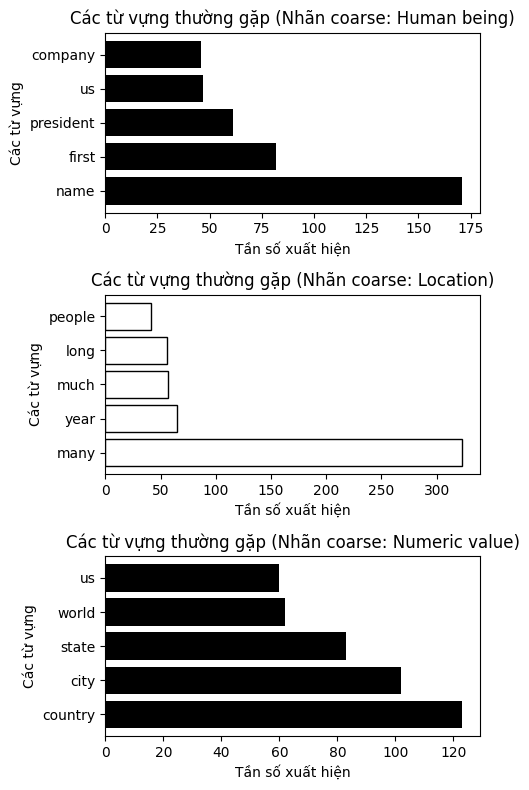

In [132]:
plt.figure(figsize = (5, 8))
corpus_negative = create_corpus(3)
plt.subplot(3, 1, 1)
plot_most_common_words(corpus_negative, 3, 'black')

corpus_negative = create_corpus(4)
plt.subplot(3, 1, 2)
plot_most_common_words(corpus_negative, 4, 'white')

corpus_negative = create_corpus(5)
plt.subplot(3, 1, 3)
plot_most_common_words(corpus_negative, 5, 'black')

plt.subplots_adjust(wspace=0.5)  
plt.tight_layout()
plt.show()

# Phân loại văn bản (phản hồi)

In [227]:
X_train = df_train['text']
X_test = df_test['text']


In [228]:
y_train_co = df_train['label-coarse'].values
y_test_co = df_test['label-coarse'].values
y_train_fi = df_train['label-fine'].values
y_test_fi = df_test['label-fine'].values

### Token hóa

In [229]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [230]:
X_train

[[3085, 464, 213, 860],
 [38, 84, 55, 1093, 3086],
 [11, 312, 1420, 238, 1],
 [3087, 1957, 3088, 398, 18, 1421],
 [465, 105, 3089],
 [1422, 1423, 399, 1094, 1424],
 [66, 71, 266, 861, 400, 44],
 [313, 862],
 [1958, 3090],
 [1, 3091, 1095, 1096, 67, 171],
 [3092, 3093, 56],
 [1959, 1097, 172, 3094, 3095],
 [1960, 1425],
 [91, 1098],
 [401, 3096, 3097, 1099, 3098, 314, 289],
 [3099, 4, 10, 214, 1961],
 [3100, 863, 4, 864, 466],
 [2, 1962, 1100, 1963, 716, 1964],
 [527, 528, 1965],
 [3101, 1426],
 [131, 267, 52],
 [1427, 529, 3102, 467],
 [1, 603, 46, 3103],
 [356, 530],
 [39, 1, 1101],
 [1966, 1967, 75],
 [1428, 717, 865],
 [79, 3104, 92, 10],
 [1, 357, 866, 1968, 402],
 [21, 10, 3105, 3106, 718],
 [194, 531, 48],
 [3107, 1429],
 [2, 215, 6, 719, 3108, 140, 604],
 [33, 403, 3109, 3110, 216, 315, 195],
 [2, 1430, 3111, 148, 467],
 [1431, 404],
 [3112, 53, 22],
 [720, 3113, 1102, 1969],
 [867, 3114, 405, 1970, 36, 158],
 [1971, 3115, 406, 31, 3116],
 [1432, 407, 1433, 721],
 [3117, 3118, 3

In [231]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

7563

### Chuỗi số hóa các đầu vào với độ dài các chuỗi là véc-tơ 100 chiều

In [232]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [260]:
print(X_train[1])
len(X_train[1])

[  38   84   55 1093 3086    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


100

### Tạo ma trận nhúng với GloVe

In [148]:
embeddings_dictionary = dict()
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions


In [149]:
embedding_matrix = np.zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11326   , -0.23055001,  0.4684    , ..., -0.46822   ,
         0.19834   , -0.048772  ],
       [-0.32914001,  0.82887   , -0.14182   , ..., -0.057574  ,
         0.62466002,  0.59499002],
       ...,
       [ 0.39177999, -1.05120003, -0.32868001, ...,  0.32571   ,
         0.16468   , -0.39421999],
       [ 0.25367999, -0.05276   , -0.9393    , ...,  0.27869001,
        -0.19347   ,  0.20701   ],
       [-0.57730001, -0.048476  ,  0.31992999, ..., -0.92940003,
         0.64241999,  0.14701   ]])

In [150]:
embedding_matrix.shape

(7563, 100)

### Mô hình với kiến trúc rẽ nhánh

In [255]:
N_CO = 6
N_FINE = 47

class CoarseFineNet(object):
    def _coarse(input, classes = N_CO, finAct = 'softmax'):
        x = Sequential() (input)
        x = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False) (x)

        x = Conv1D(128, 5, activation='relu') (x)
        x = GlobalMaxPooling1D() (x)
        x = Dense(classes) (x)
        x = Activation(finAct, name = 'coarse_output') (x)
        return x
    
    def _fine(input, classes = N_FINE, finAct = 'softmax'):
        x = Sequential() (input)
        x = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False) (x)

        x = Conv1D(128, 5, activation='relu') (x)
        x = GlobalMaxPooling1D() (x)
        x = Dense(classes) (x)
        x = Activation(finAct, name = 'fine_output') (x)
        return x

    @staticmethod
    def build(inputshape, numCoarse = N_CO, numFine = N_FINE):
        inpts = Input(shape=inputshape)
        coarseBranch = CoarseFineNet._coarse(input = inpts, 
                                                        classes = numCoarse, 
                                                        finAct = 'softmax')
        fineBranch = CoarseFineNet._fine(input = inpts, 
                                              classes = numFine, 
                                              finAct = 'softmax')
        model = Model(inputs = inpts, outputs = [coarseBranch, fineBranch], name = 'COARSE_FINE_net')
        return model

model = CoarseFineNet.build(inputshape = maxlen)

In [240]:
lossWeights = {"coarse_output": 1.0, 
               "fine_output": 1.0}

losses = {"coarse_output": "categorical_crossentropy",
          "fine_output": "categorical_crossentropy"}

model.compile(optimizer='adam', loss = losses, loss_weights = lossWeights, metrics=['accuracy'])

print(model.summary())

Model: "COARSE_FINE_net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 sequential_11 (Sequential)  multiple                     0         ['input_7[0][0]']             
                                                                                                  
 sequential_12 (Sequential)  multiple                     0         ['input_7[0][0]']             
                                                                                                  
 embedding_10 (Embedding)    (None, 100, 100)             756300    ['sequential_11[0][0]']       
                                                                                    

In [241]:
# Đối với việc mô hình phân loại đa lớp, mình cần điều chỉnh dữ liệu sao cho nó phù hợp với định dạng của hàm mất mát

y_train_co = to_categorical(y_train_co, num_classes=N_CO)
y_train_fi = to_categorical(y_train_fi, num_classes=N_FINE)
y_test_co = to_categorical(y_test_co, num_classes=N_CO)
y_test_fi = to_categorical(y_test_fi, num_classes=N_FINE)

print(y_train_co.shape) 
print(y_train_fi.shape)   
print(y_test_co.shape) 
print(y_test_fi.shape)   

(5452, 6)
(5452, 47)
(500, 6)
(500, 47)


In [242]:
history = model.fit(
	X_train, {"coarse_output": y_train_co, "fine_output": y_train_fi},
	validation_data=(X_test, {"coarse_output": y_test_co, "fine_output": y_test_fi}),
	batch_size=128,
	epochs=50, verbose=1)

Epoch 1/50
43/43 [==============================] - 3s 59ms/step - loss: 4.4889 - coarse_output_loss: 1.4204 - fine_output_loss: 3.0685 - coarse_output_accuracy: 0.4231 - fine_output_accuracy: 0.2289 - val_loss: 4.4907 - val_coarse_output_loss: 1.3395 - val_fine_output_loss: 3.1512 - val_coarse_output_accuracy: 0.5600 - val_fine_output_accuracy: 0.4200
Epoch 2/50
43/43 [==============================] - 2s 53ms/step - loss: 3.4653 - coarse_output_loss: 1.0549 - fine_output_loss: 2.4105 - coarse_output_accuracy: 0.6223 - fine_output_accuracy: 0.3808 - val_loss: 3.9884 - val_coarse_output_loss: 1.1746 - val_fine_output_loss: 2.8138 - val_coarse_output_accuracy: 0.6360 - val_fine_output_accuracy: 0.4300
Epoch 3/50
43/43 [==============================] - 2s 51ms/step - loss: 2.8444 - coarse_output_loss: 0.8613 - fine_output_loss: 1.9831 - coarse_output_accuracy: 0.7197 - fine_output_accuracy: 0.4883 - val_loss: 3.5876 - val_coarse_output_loss: 1.0739 - val_fine_output_loss: 2.5137 - val_c

### Sau huấn luyện

In [243]:
np.round(model.evaluate(X_test, [y_test_co, y_test_fi]), 2)

16/16 [==============================] - 1s 12ms/step - loss: 2.5521 - coarse_output_loss: 1.0053 - fine_output_loss: 1.5468 - coarse_output_accuracy: 0.7420 - fine_output_accuracy: 0.6320


array([2.55, 1.01, 1.55, 0.74, 0.63])

### Dự đoán với dữ liệu đơn

In [244]:
def preprocess(text):
    text = convert_lowercase(text)
    text = remove_punc(text)
    text = remove_stopwords(text)
    text = perform_lemmatization(text)
    tokenized = word_tokenizer.texts_to_sequences([text])
    tokenized = pad_sequences(tokenized, padding='post', maxlen=100)

    return tokenized

coarseProb, fineProb = model.predict(preprocess("What is the money they use in Zambia ?	")) # Lưu 2 véc-tơ chứa các xác suất vào 2 biến
coarseID, fineID = coarseProb[0].argmax(), fineProb[0].argmax() # Lấy vị trí của xác suất cao nhất chứa trong 2 véc-tơ

print(coarseID, fineID)
print("Dự đoán:\n-",coarse[coarseID],":",np.max(coarseProb),
      "\n-",fine[fineID],":",np.max(fineProb))

1/1 [==============================] - 0s 73ms/step
1 46
Dự đoán:
- Entity : 0.98722446 
- Speed : 0.9276621


### Lưu và tải mô hình

In [245]:
pickle.dump(model, open('model.pkl', 'wb'))

In [246]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

### Dự đoán các dữ liệu trong tập thử

In [247]:
data = pd.read_csv('test.csv')

In [248]:
# Lưu các giá trị dự đoán vào 2 danh sách cụ thể cho 2 nhãn

listOfPredictedCoarse = []
listOfPredictedFine = []

for text in X_test:
    
    coarseProb, fineProb  = model.predict(np.expand_dims(text, axis=0)) 

    coarseID, fineID = coarseProb[0].argmax(), fineProb[0].argmax()
    listOfPredictedCoarse.append(coarseID)
    listOfPredictedFine.append(fineID)

1/1 [==============================] - 0s 23ms/step


In [249]:
# Thêm 2 danh sách chứa các giá trị dự đoán vào bảng dữ liệu tạo ra 2 cột mới 

data['predicted-coarse'] = listOfPredictedCoarse
data['predicted-fine'] = listOfPredictedFine

In [250]:
data

,label-coarse,label-fine,text,predicted-coarse,predicted-fine
0,4,40,How far is it from Denver to Aspen ?,4,40
1,5,21,"What county is Modesto , California in ?",5,14
2,3,12,Who was Galileo ?,0,7
3,0,7,What is an atom ?,0,7
4,4,8,When did Hawaii become a state ?,5,14
...,...,...,...,...,...
495,3,4,Who was the 22nd President of the US ?,3,4
496,1,46,What is the money they use in Zambia ?,1,46
497,4,13,How many feet in a mile ?,4,13
498,1,28,What is the birthstone of October ?,1,7


In [252]:
# Lọc ra các giá trị dự đoán sai

correctly_predicted = data[(data['label-coarse'] == data['predicted-coarse']) & (data['label-fine'] == data['predicted-fine'])].drop(columns = 'text')
correctly_predicted

,label-coarse,label-fine,predicted-coarse,predicted-fine
0,4,40,4,40
3,0,7,0,7
5,4,40,4,40
8,0,9,0,9
9,0,7,0,7
...,...,...,...,...
494,4,13,4,13
495,3,4,3,4
496,1,46,1,46
497,4,13,4,13


In [253]:
data.to_csv('test_with_prediction.csv', index=False)